<a href="https://colab.research.google.com/github/WillKWL/Project-NBASeason/blob/master/2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [119]:
# remove library not used
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = [20, 5]
import seaborn as sns
from scipy.stats import zscore
from matplotlib.patches import Rectangle
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

In [226]:
# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

# Read train set

In [3]:
train_set = pd.read_pickle("https://github.com/WillKWL/PublicData/blob/main/raw/nba_season_vs_playoff_train.pkl?raw=true")
train_set

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,CFID,CFPARAMS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FG3M,OPP_FG3A,OPP_FG3_PCT,OPP_FTM,OPP_FTA,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS,PLAYOFF_RANKING,SEASON,UNIQUE_ID
0,1610612741,Chicago Bulls,82,69,13,0.841,52.5,43.6,92.0,0.473,7.0,18.7,0.373,18.4,24.6,0.747,16.4,32.7,49.1,28.5,14.7,9.5,4.4,3.8,21.5,0.2,112.4,11.8,10,Chicago Bulls,38.5,88.4,0.436,6.3,18.7,0.335,17.3,23.5,0.737,14.5,29.3,43.8,21.5,17.2,8.3,3.8,4.4,23.0,21.5,100.7,1,1996-97,1610612741199697
1,1610612737,Atlanta Hawks,82,56,26,0.683,54.2,38.5,86.3,0.446,9.0,25.1,0.360,20.4,26.8,0.763,14.0,32.2,46.2,21.3,16.8,9.6,5.8,4.5,21.8,0.1,106.4,6.1,10,Atlanta Hawks,38.4,88.3,0.435,6.6,19.2,0.347,16.9,22.9,0.737,14.3,30.4,44.8,22.8,17.3,8.3,4.5,5.8,23.9,21.8,100.3,0,1996-97,1610612737199697
2,1610612750,Minnesota Timberwolves,82,40,42,0.488,52.1,38.7,84.8,0.456,4.9,14.4,0.339,21.6,28.7,0.751,12.6,30.3,42.9,24.7,16.4,8.1,7.3,5.9,24.0,0.2,103.9,-1.6,10,Minnesota Timberwolves,38.8,86.2,0.450,6.2,17.0,0.362,21.7,28.8,0.754,14.1,31.1,45.2,23.5,16.9,8.6,5.9,7.3,24.1,24.0,105.5,0,1996-97,1610612750199697
4,1610612762,Utah Jazz,82,64,18,0.780,52.7,41.6,82.7,0.504,4.4,12.0,0.370,24.7,32.1,0.769,11.8,32.0,43.9,29.2,16.7,9.9,5.6,5.0,26.3,0.2,112.4,9.6,10,Utah Jazz,36.0,82.3,0.438,6.9,19.7,0.352,23.9,31.8,0.750,12.7,27.9,40.7,21.2,17.7,8.5,5.0,5.6,27.2,26.3,102.8,0,1996-97,1610612762199697
5,1610612761,Toronto Raptors,82,30,52,0.366,52.1,38.1,87.2,0.437,7.7,21.3,0.363,19.0,26.4,0.720,14.9,29.6,44.5,22.5,17.7,9.5,6.8,5.8,24.8,0.1,102.9,-3.4,10,Toronto Raptors,39.1,84.0,0.465,6.5,18.8,0.348,21.6,29.9,0.724,13.6,30.9,44.5,25.9,17.6,8.9,5.8,6.8,23.6,24.8,106.3,0,1996-97,1610612761199697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,1610612742,Dallas Mavericks,82,52,30,0.634,50.2,40.9,88.7,0.461,13.6,38.9,0.350,17.0,22.1,0.771,9.6,35.2,44.8,24.4,13.0,7.0,4.1,3.8,20.5,20.9,112.5,3.4,10,Dallas Mavericks,40.6,88.9,0.457,11.4,33.5,0.340,16.5,21.5,0.767,9.9,35.6,45.5,24.5,13.6,7.3,3.8,4.1,20.9,20.5,109.1,0,2021-22,1610612742202122
767,1610612739,Cleveland Cavaliers,82,44,38,0.537,49.5,40.9,87.1,0.469,12.0,33.7,0.355,17.3,22.7,0.760,10.5,35.0,45.5,25.9,14.8,7.3,4.3,4.8,18.0,20.6,111.0,2.2,10,Cleveland Cavaliers,40.6,89.8,0.452,12.1,34.2,0.353,15.5,20.0,0.774,10.8,33.4,44.1,24.8,13.8,8.7,4.8,4.3,20.6,18.0,108.8,0,2021-22,1610612739202122
768,1610612741,Chicago Bulls,82,46,36,0.561,48.6,42.1,87.7,0.480,10.7,29.1,0.369,17.7,21.7,0.813,8.8,34.0,42.7,24.1,13.0,7.2,4.1,5.0,19.0,18.3,112.7,-0.4,10,Chicago Bulls,41.8,88.3,0.474,11.8,32.3,0.366,17.6,22.1,0.795,9.4,34.2,43.6,25.2,13.2,7.2,5.0,4.1,18.3,19.0,113.0,0,2021-22,1610612741202122
769,1610612766,Charlotte Hornets,82,43,39,0.524,47.8,42.2,90.1,0.468,13.7,37.6,0.365,15.6,21.1,0.740,10.7,33.2,43.9,27.7,13.1,8.5,4.8,4.5,19.6,19.3,113.6,0.4,10,Charlotte Hornets,41.4,88.8,0.466,13.8,38.1,0.362,16.6,21.8,0.763,11.2,35.1,46.3,26.1,14.8,7.4,4.5,4.8,19.3,19.6,113.2,0,2021-22,1610612766202122


# Exploratory data analysis
- dataset set can be split into left and right half
- left half = team stats
- right half = team stats (ranked)
- Y = PLAYOFF_RANKING

In [ ]:
pd.DataFrame(train_set.dtypes).T

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,CFID,CFPARAMS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FG3M,OPP_FG3A,OPP_FG3_PCT,OPP_FTM,OPP_FTA,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS,PLAYOFF_RANKING,SEASON,UNIQUE_ID
0,object,object,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,category,category,object


In [ ]:
train_set.describe()

,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FG3M,OPP_FG3A,OPP_FG3_PCT,OPP_FTM,OPP_FTA,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.00000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,79.243112,39.291734,39.951378,0.496026,50.939222,39.34295,86.940681,0.452590,7.676013,21.578282,0.353887,19.093355,25.297731,0.755896,11.867585,32.967747,44.835170,23.273258,15.340194,8.073906,5.151053,5.187682,22.208428,14.027877,105.454457,-0.075203,39.372934,86.929498,0.452942,7.658671,21.500810,0.355178,19.125770,25.323177,0.755925,11.858509,32.994327,44.854133,23.310049,15.315883,8.107618,5.187682,5.151053,22.210859,22.208266,105.530794
std,7.231507,12.858842,12.953497,0.155499,1.998738,1.56598,2.095438,0.016397,2.815860,7.553241,0.021219,2.207375,3.088594,0.029930,1.760447,1.752766,1.850486,1.924681,1.425512,0.948144,0.891047,0.751413,2.257684,10.115921,4.390284,4.904257,1.696912,2.087199,0.015962,2.540802,6.886266,0.015414,2.227638,3.082222,0.016660,1.475865,1.723091,1.633364,1.675113,1.437217,0.793126,0.751413,0.891047,2.137709,2.257480,4.268511
min,50.000000,7.000000,9.000000,0.106000,45.500000,34.20000,80.400000,0.401000,2.100000,8.100000,0.264000,12.800000,17.400000,0.668000,7.700000,27.300000,37.800000,17.800000,11.200000,5.700000,2.400000,3.100000,16.800000,0.000000,91.200000,-15.100000,34.400000,79.600000,0.402000,3.700000,11.500000,0.300000,14.200000,18.200000,0.694000,8.300000,27.000000,39.900000,18.100000,11.500000,6.200000,3.100000,2.400000,17.500000,16.800000,93.000000
25%,82.000000,29.000000,30.000000,0.380000,49.500000,38.30000,85.600000,0.442000,5.600000,16.000000,0.341000,17.500000,22.900000,0.739000,10.600000,31.800000,43.600000,21.900000,14.300000,7.500000,4.500000,4.700000,20.500000,0.200000,102.700000,-3.400000,38.300000,85.700000,0.442000,5.700000,16.200000,0.345000,17.500000,23.000000,0.745000,10.800000,31.900000,43.700000,22.100000,14.300000,7.500000,4.700000,4.500000,20.600000,20.500000,102.600000
50%,82.000000,40.000000,39.000000,0.506000,51.200000,39.30000,87.000000,0.452000,7.200000,20.100000,0.354000,19.000000,25.300000,0.757000,11.800000,32.900000,44.800000,23.200000,15.300000,8.000000,5.100000,5.200000,22.100000,20.000000,105.100000,0.000000,39.500000,87.000000,0.454000,6.900000,19.500000,0.355000,18.900000,25.100000,0.756000,11.800000,33.000000,44.900000,23.400000,15.300000,8.100000,5.200000,5.100000,22.100000,22.100000,105.400000
75%,82.000000,49.000000,49.000000,0.610000,52.500000,40.40000,88.400000,0.464000,9.400000,26.200000,0.368000,20.500000,27.300000,0.776000,13.000000,34.200000,46.100000,24.400000,16.300000,8.700000,5.700000,5.700000,23.700000,21.700000,108.500000,3.400000,40.600000,88.300000,0.464000,9.100000,25.400000,0.365000,20.700000,27.600000,0.768000,13.000000,34.100000,46.000000,24.500000,16.300000,8.600000,5.700000,5.700000,23.700000,23.700000,108.700000
max,82.000000,73.000000,72.000000,0.890000,56.900000,43.70000,93.300000,0.504000,16.800000,45.800000,0.428000,27.400000,35.400000,0.839000,18.100000,39.800000,51.600000,30.100000,20.800000,12.000000,8.600000,7.400000,29.500000,28.400000,117.300000,11.800000,44.100000,93.200000,0.503000,14.600000,40.200000,0.406000,27.400000,35.800000,0.807000,16.200000,38.100000,51.000000,28.300000,20.300000,11.400000,7.400000,8.600000,29.200000,29.500000,116.600000


In [ ]:
# explanatory variable (Y) = PLAYOFF_RANKING
# for some seasons, we don't have a champion becuz of train-test split
train_set.groupby(["SEASON"]).PLAYOFF_RANKING.value_counts().reset_index().pivot(index = "level_1", columns = "SEASON", values = "PLAYOFF_RANKING")

SEASON,1996-97,1997-98,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22
level_1,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24,23,23,22,23,25,21,23,24,21,22,23,20,21,23,23,21,23,26,24,23,22,23,24,25,24
1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1


In [ ]:
# no missing data
train_set.isna().sum()[train_set.isna().sum() != 0]

Series([], dtype: int64)

In [ ]:
numeric_col = train_set.columns[[x in train_set.select_dtypes(include=np.number).columns for x in train_set.columns]].tolist()
print(f"number of numeric columns: {len(numeric_col)}")

number of numeric columns: 46


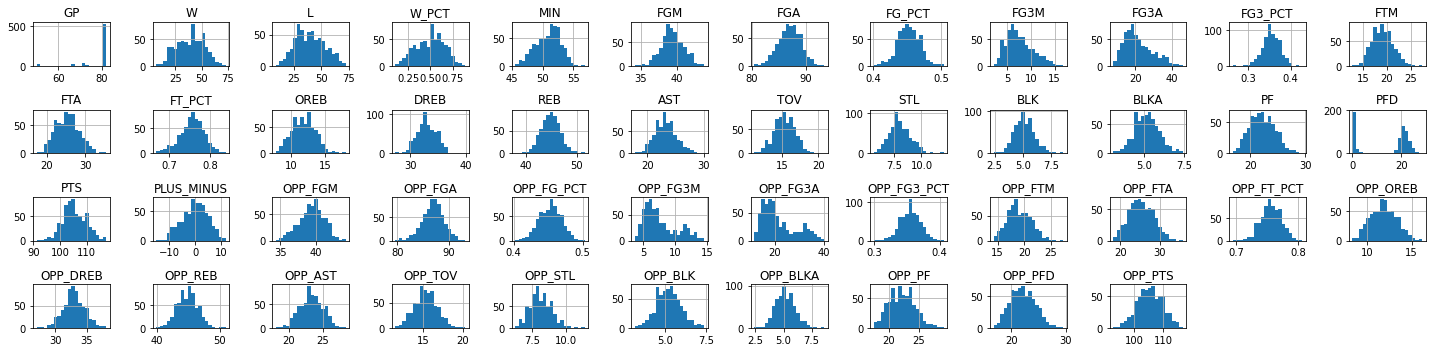

In [ ]:
# plot distributions of each numeric column
# rank of each variable will exhibit uniform distribution
train_set.hist(bins=20, layout = (4, int(len(numeric_col) / 4) + 1))
plt.tight_layout()
plt.show()

In [ ]:
# outlier: PFD (Personal Fouls Drawn) with a high frequency at 0 while OPP_PF (ie PFD) has a more even distribution
train_set.PFD.value_counts(bins = np.linspace(train_set.PFD.min(), train_set.PFD.max(), 10, dtype=int)).sort_index()

(-0.001, 3.0]    211
(3.0, 6.0]         4
(6.0, 9.0]         0
(9.0, 12.0]        0
(12.0, 15.0]       0
(15.0, 18.0]       9
(18.0, 22.0]     265
(22.0, 25.0]     116
(25.0, 28.0]      11
Name: PFD, dtype: int64

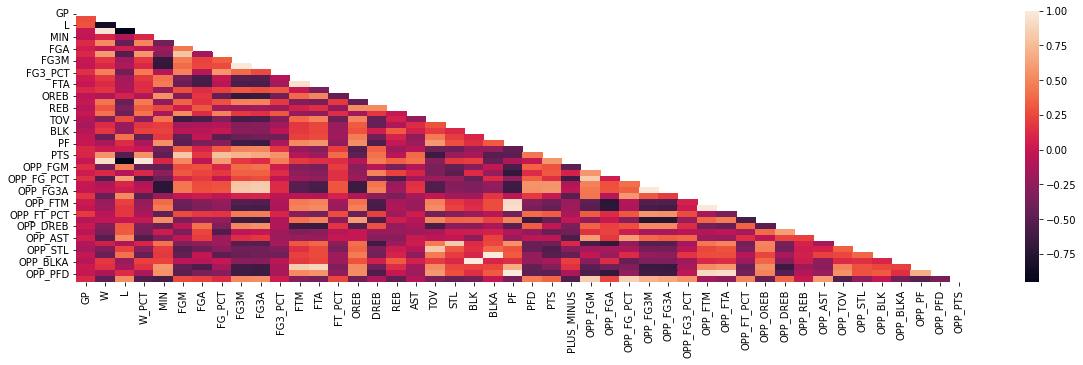

In [ ]:
# normal observations:
## positive correlation between Wins and Plus Minus (net of points scored and lost per 100 posessions)
## negative correlation between FGM, FGA vs defensive stats (STL, BLK, PF) -> perhaps more effort on defensive end means less energy available on offensive end

# interesting observations:
## negative correlation between OREB and (FG3M, FG3A, FG3%) but not so much with FG -> missing shots lead to more OREB and fewer attempts
## positive correlation between DREB and (FG3M, FG3A, FG3%) but not so much with FG -> opponents missing shots lead to more risk taking in shooting 3 instead of 2
corr_mat = train_set.loc[:,numeric_col].corr()
sns.heatmap(corr_mat, 
            annot=False, 
            mask = np.triu(corr_mat)) # to show only lower triangle
plt.show()

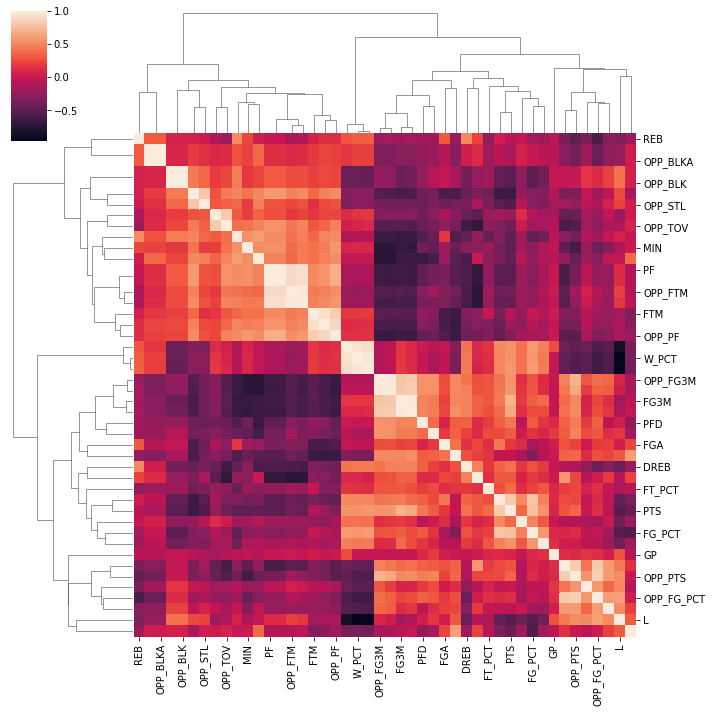

In [ ]:
# use dendrogram to see clusters
sns.clustermap(corr_mat)

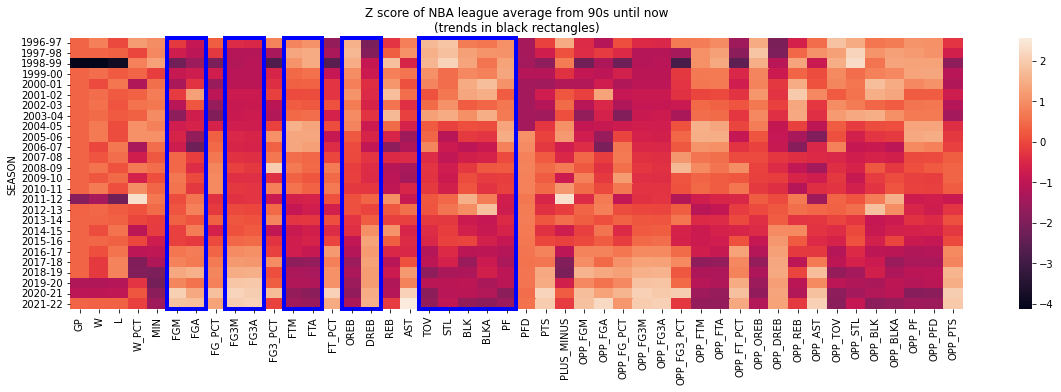

In [ ]:
# it's often mentioned that NBA teams in different era play with different styles
# we have already adjusted the stats per possession so pace doesn't impact the numbers here
# in 90s, teams play more defense and are more physical (higher PF, BLK, STL, TOV)
# in recent era, teams shoot more 3s and score more points (FG and FG3)
# Feature engineering: clustering for SEASON to take into account this difference 
ax = sns.heatmap(train_set.loc[:,numeric_col + ["SEASON"]].groupby("SEASON").mean().apply(zscore))
plt.title("Z score of NBA league average from 90s until now\n(trends in black rectangles)")
for col in [("FGM", "FGA"), ("FG3M", "FG3A"), ("FTM", "FTA"), ("OREB", "DREB"), ("TOV", "STL", "BLK", "BLKA", "PF")]:
  if len(col) > 1:
    ax.add_patch(Rectangle((numeric_col.index(col[0]), 0), len(col), len(train_set.SEASON.unique()), fill=False, edgecolor="blue", lw=4, clip_on=False))
  else:
    ax.add_patch(Rectangle((numeric_col.index(col), 0), 1, len(train_set.SEASON.unique()), fill=False, edgecolor="blue", lw=4, clip_on=False))
plt.show()

# Data preparation
- Data cleaning
  - Fix PFD column with OPP_PF column
  - Drop irrelevant columns, e.g. GP (Games Played) is 82 for most seasons and stats are already normalized per 100 possessions
  - Feature scaling
    - Transform numeric variables by normal quantiles 
  
- Feature engineering
  - Cluster similar seasons together with KMeans to represent different NBA eras
  - Add column "FG2A" = "FGA" - "FG3A" and "FG2M" = "FGM" - "FG3M"
  - Add column "FG2A"/"FG3A" to represent % of 2-point shots taken vs 3-point shots taken

- Dimensionality reduction
  - PCA to speed up random forest and fix axis orientation issue with decision tree

- Feature selection
  - Use random forest to drop useless features

In [394]:
# make a copy and split X and y 
season = train_set.drop(columns = "PLAYOFF_RANKING").reset_index(drop = True).copy(deep = True)
season_label = train_set[["PLAYOFF_RANKING"]].values.reshape(-1,)

In [395]:
# X_train before data preparation
season

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,CFID,CFPARAMS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FG3M,OPP_FG3A,OPP_FG3_PCT,OPP_FTM,OPP_FTA,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS,SEASON,UNIQUE_ID
0,1610612741,Chicago Bulls,82,69,13,0.841,52.5,43.6,92.0,0.473,7.0,18.7,0.373,18.4,24.6,0.747,16.4,32.7,49.1,28.5,14.7,9.5,4.4,3.8,21.5,0.2,112.4,11.8,10,Chicago Bulls,38.5,88.4,0.436,6.3,18.7,0.335,17.3,23.5,0.737,14.5,29.3,43.8,21.5,17.2,8.3,3.8,4.4,23.0,21.5,100.7,1996-97,1610612741199697
1,1610612737,Atlanta Hawks,82,56,26,0.683,54.2,38.5,86.3,0.446,9.0,25.1,0.360,20.4,26.8,0.763,14.0,32.2,46.2,21.3,16.8,9.6,5.8,4.5,21.8,0.1,106.4,6.1,10,Atlanta Hawks,38.4,88.3,0.435,6.6,19.2,0.347,16.9,22.9,0.737,14.3,30.4,44.8,22.8,17.3,8.3,4.5,5.8,23.9,21.8,100.3,1996-97,1610612737199697
2,1610612750,Minnesota Timberwolves,82,40,42,0.488,52.1,38.7,84.8,0.456,4.9,14.4,0.339,21.6,28.7,0.751,12.6,30.3,42.9,24.7,16.4,8.1,7.3,5.9,24.0,0.2,103.9,-1.6,10,Minnesota Timberwolves,38.8,86.2,0.450,6.2,17.0,0.362,21.7,28.8,0.754,14.1,31.1,45.2,23.5,16.9,8.6,5.9,7.3,24.1,24.0,105.5,1996-97,1610612750199697
3,1610612762,Utah Jazz,82,64,18,0.780,52.7,41.6,82.7,0.504,4.4,12.0,0.370,24.7,32.1,0.769,11.8,32.0,43.9,29.2,16.7,9.9,5.6,5.0,26.3,0.2,112.4,9.6,10,Utah Jazz,36.0,82.3,0.438,6.9,19.7,0.352,23.9,31.8,0.750,12.7,27.9,40.7,21.2,17.7,8.5,5.0,5.6,27.2,26.3,102.8,1996-97,1610612762199697
4,1610612761,Toronto Raptors,82,30,52,0.366,52.1,38.1,87.2,0.437,7.7,21.3,0.363,19.0,26.4,0.720,14.9,29.6,44.5,22.5,17.7,9.5,6.8,5.8,24.8,0.1,102.9,-3.4,10,Toronto Raptors,39.1,84.0,0.465,6.5,18.8,0.348,21.6,29.9,0.724,13.6,30.9,44.5,25.9,17.6,8.9,5.8,6.8,23.6,24.8,106.3,1996-97,1610612761199697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,1610612742,Dallas Mavericks,82,52,30,0.634,50.2,40.9,88.7,0.461,13.6,38.9,0.350,17.0,22.1,0.771,9.6,35.2,44.8,24.4,13.0,7.0,4.1,3.8,20.5,20.9,112.5,3.4,10,Dallas Mavericks,40.6,88.9,0.457,11.4,33.5,0.340,16.5,21.5,0.767,9.9,35.6,45.5,24.5,13.6,7.3,3.8,4.1,20.9,20.5,109.1,2021-22,1610612742202122
613,1610612739,Cleveland Cavaliers,82,44,38,0.537,49.5,40.9,87.1,0.469,12.0,33.7,0.355,17.3,22.7,0.760,10.5,35.0,45.5,25.9,14.8,7.3,4.3,4.8,18.0,20.6,111.0,2.2,10,Cleveland Cavaliers,40.6,89.8,0.452,12.1,34.2,0.353,15.5,20.0,0.774,10.8,33.4,44.1,24.8,13.8,8.7,4.8,4.3,20.6,18.0,108.8,2021-22,1610612739202122
614,1610612741,Chicago Bulls,82,46,36,0.561,48.6,42.1,87.7,0.480,10.7,29.1,0.369,17.7,21.7,0.813,8.8,34.0,42.7,24.1,13.0,7.2,4.1,5.0,19.0,18.3,112.7,-0.4,10,Chicago Bulls,41.8,88.3,0.474,11.8,32.3,0.366,17.6,22.1,0.795,9.4,34.2,43.6,25.2,13.2,7.2,5.0,4.1,18.3,19.0,113.0,2021-22,1610612741202122
615,1610612766,Charlotte Hornets,82,43,39,0.524,47.8,42.2,90.1,0.468,13.7,37.6,0.365,15.6,21.1,0.740,10.7,33.2,43.9,27.7,13.1,8.5,4.8,4.5,19.6,19.3,113.6,0.4,10,Charlotte Hornets,41.4,88.8,0.466,13.8,38.1,0.362,16.6,21.8,0.763,11.2,35.1,46.3,26.1,14.8,7.4,4.5,4.8,19.3,19.6,113.2,2021-22,1610612766202122


In [396]:
# y_train before data preparation
season_label

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Feature engineering - NewColumn
- Before data cleaning
- Add column "FG2A" = "FGA" - "FG3A" and "FG2M" = "FGM" - "FG3M"
- Add column "FG2A"/"FG3A" to represent % of 2-point shots taken vs 3-point shots taken

In [397]:
# create a custom transformer to perform numerical operations on columns 
# FunctionTransformer cannot be used in pipeline since it does not return the whole dataframe + the new columns
class NewColumn(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass
  
  def fit(self, X, y = None):
    return self
  
  def transform(self, X):
    # 2 Point Field Goals Attempted = All Field Goals Attempted - 3 Point Field Goals Attempted
    output = X.copy(deep = True)
    output['FG2A'] = output['FGA'] - output['FG3A']
    # 2 Point Field Goals Made
    output['FG2M'] = output['FGM'] - output['FG3M']
    # Percentage of 2 Point Field Goals Made
    output['FG2_PCT'] = output['FG2M'] / output['FG2A']
    # Ratio of 2 Point Field Goals Attempted to 3 Point Field Goals Attempted
    output['FG2_FG3'] = output['FG2A'] / output['FG3A']
    self.output_names = output.columns
    return output
  
  def get_feature_names_out(self, names = None):
    return self.output_names

In [398]:
NewColumn().fit_transform(season)

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,CFID,CFPARAMS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FG3M,OPP_FG3A,OPP_FG3_PCT,OPP_FTM,OPP_FTA,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS,SEASON,UNIQUE_ID,FG2A,FG2M,FG2_PCT,FG2_FG3
0,1610612741,Chicago Bulls,82,69,13,0.841,52.5,43.6,92.0,0.473,7.0,18.7,0.373,18.4,24.6,0.747,16.4,32.7,49.1,28.5,14.7,9.5,4.4,3.8,21.5,0.2,112.4,11.8,10,Chicago Bulls,38.5,88.4,0.436,6.3,18.7,0.335,17.3,23.5,0.737,14.5,29.3,43.8,21.5,17.2,8.3,3.8,4.4,23.0,21.5,100.7,1996-97,1610612741199697,73.3,36.6,0.499318,3.919786
1,1610612737,Atlanta Hawks,82,56,26,0.683,54.2,38.5,86.3,0.446,9.0,25.1,0.360,20.4,26.8,0.763,14.0,32.2,46.2,21.3,16.8,9.6,5.8,4.5,21.8,0.1,106.4,6.1,10,Atlanta Hawks,38.4,88.3,0.435,6.6,19.2,0.347,16.9,22.9,0.737,14.3,30.4,44.8,22.8,17.3,8.3,4.5,5.8,23.9,21.8,100.3,1996-97,1610612737199697,61.2,29.5,0.482026,2.438247
2,1610612750,Minnesota Timberwolves,82,40,42,0.488,52.1,38.7,84.8,0.456,4.9,14.4,0.339,21.6,28.7,0.751,12.6,30.3,42.9,24.7,16.4,8.1,7.3,5.9,24.0,0.2,103.9,-1.6,10,Minnesota Timberwolves,38.8,86.2,0.450,6.2,17.0,0.362,21.7,28.8,0.754,14.1,31.1,45.2,23.5,16.9,8.6,5.9,7.3,24.1,24.0,105.5,1996-97,1610612750199697,70.4,33.8,0.480114,4.888889
3,1610612762,Utah Jazz,82,64,18,0.780,52.7,41.6,82.7,0.504,4.4,12.0,0.370,24.7,32.1,0.769,11.8,32.0,43.9,29.2,16.7,9.9,5.6,5.0,26.3,0.2,112.4,9.6,10,Utah Jazz,36.0,82.3,0.438,6.9,19.7,0.352,23.9,31.8,0.750,12.7,27.9,40.7,21.2,17.7,8.5,5.0,5.6,27.2,26.3,102.8,1996-97,1610612762199697,70.7,37.2,0.526167,5.891667
4,1610612761,Toronto Raptors,82,30,52,0.366,52.1,38.1,87.2,0.437,7.7,21.3,0.363,19.0,26.4,0.720,14.9,29.6,44.5,22.5,17.7,9.5,6.8,5.8,24.8,0.1,102.9,-3.4,10,Toronto Raptors,39.1,84.0,0.465,6.5,18.8,0.348,21.6,29.9,0.724,13.6,30.9,44.5,25.9,17.6,8.9,5.8,6.8,23.6,24.8,106.3,1996-97,1610612761199697,65.9,30.4,0.461305,3.093897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,1610612742,Dallas Mavericks,82,52,30,0.634,50.2,40.9,88.7,0.461,13.6,38.9,0.350,17.0,22.1,0.771,9.6,35.2,44.8,24.4,13.0,7.0,4.1,3.8,20.5,20.9,112.5,3.4,10,Dallas Mavericks,40.6,88.9,0.457,11.4,33.5,0.340,16.5,21.5,0.767,9.9,35.6,45.5,24.5,13.6,7.3,3.8,4.1,20.9,20.5,109.1,2021-22,1610612742202122,49.8,27.3,0.548193,1.280206
613,1610612739,Cleveland Cavaliers,82,44,38,0.537,49.5,40.9,87.1,0.469,12.0,33.7,0.355,17.3,22.7,0.760,10.5,35.0,45.5,25.9,14.8,7.3,4.3,4.8,18.0,20.6,111.0,2.2,10,Cleveland Cavaliers,40.6,89.8,0.452,12.1,34.2,0.353,15.5,20.0,0.774,10.8,33.4,44.1,24.8,13.8,8.7,4.8,4.3,20.6,18.0,108.8,2021-22,1610612739202122,53.4,28.9,0.541199,1.584570
614,1610612741,Chicago Bulls,82,46,36,0.561,48.6,42.1,87.7,0.480,10.7,29.1,0.369,17.7,21.7,0.813,8.8,34.0,42.7,24.1,13.0,7.2,4.1,5.0,19.0,18.3,112.7,-0.4,10,Chicago Bulls,41.8,88.3,0.474,11.8,32.3,0.366,17.6,22.1,0.795,9.4,34.2,43.6,25.2,13.2,7.2,5.0,4.1,18.3,19.0,113.0,2021-22,1610612741202122,58.6,31.4,0.535836,2.013746
615,1610612766,Charlotte Hornets,82,43,39,0.524,47.8,42.2,90.1,0.468,13.7,37.6,0.365,15.6,21.1,0.740,10.7,33.2,43.9,27.7,13.1,8.5,4.8,4.5,19.6,19.3,113.6,0.4,10,Charlotte Hornets,41.4,88.8,0.466,13.8,38.1,0.362,16.6,21.8,0.763,11.2,35.1,46.3,26.1,14.8,7.4,4.5,4.8,19.3,19.6,113.2,2021-22,1610612766202122,52.5,28.5,0.542857,1.396277


## Data cleaning - num_pipeline
- Custom transformers to fix and drop columns
- Scale numeric features by normal quantiles

In [399]:
# # create a custom transformer to remove outliers with Isolation Forest
# class OutlierRemover(BaseEstimator, TransformerMixin):
#   def __init__(self, random_state = None):
#     self.random_state = random_state
  
#   def fit(self, X, y = None, sample_weight = None):
#     self.X_ = X
#     return self
  
#   def transform(self, X):
#     # self.feature_names_in_ = X_season.columns
#     # self.index_names = X_season.sort_index().index.values
#     print(X.shape)
#     print(type(X))
#     self.isolationforest_ = IsolationForest(random_state=self.random_state)
#     outliers = self.isolationforest_.fit_predict(X)
#     print(outliers)
#     return X.iloc[outliers != -1].reset_index(drop = True)
  
#   def get_feature_names_out(self):
#     return self.X_.columns.values

In [400]:
# create a custom transformer to fix PF
class FixPF(BaseEstimator, TransformerMixin):
  def __init__(self, col_drop, col_replace):
    self.col_drop = col_drop
    self.col_replace = col_replace
  
  def fit(self, X, y = None):
    return self
  
  def transform(self, X):
    output = X.copy(deep = True)
    output[[self.col_drop]] = output[[self.col_replace]]
    self.output_names = output.columns
    return output
  
  def get_feature_names_out(self, names = None):
    return self.output_names
  
# create a custom transformer to drop columns
class DropCols(BaseEstimator, TransformerMixin):
  def __init__(self, cols_drop):
    self.cols_drop = cols_drop
  
  def fit(self, X, y = None):
    return self
  
  def transform(self, X):
    output = X.copy(deep = True)
    output = output.loc[:, [x not in self.cols_drop for x in output.columns]]
    self.output_names = output.columns
    return output
  
  def get_feature_names_out(self, names = None):
    return self.output_names

In [401]:
num_pipeline = make_pipeline(
    # replace PFD with OPP_PF since both columns should be the same but we saw issues with PFD column
    FixPF("PFD", "OPP_PF"),
    # drop irrelevant / duplicate columns
    DropCols(["GP", "MIN", "OPP_PF", "OPP_PFD"]),
    # feature scaling + outlier removal by transforming features into quantiles
      # some features have heavy tails, some look like normal so let's use transform them all to normal by quantile
      # instead of taking log for every feature
    QuantileTransformer(output_distribution="normal", random_state=42)
)

In [402]:
pd.DataFrame(num_pipeline.fit_transform(season.select_dtypes(include=np.number)),
             columns = num_pipeline.get_feature_names_out())

,W,L,W_PCT,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FG3M,OPP_FG3A,OPP_FG3_PCT,OPP_FTM,OPP_FTA,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PTS
0,2.943356,-2.721761,2.943356,2.721761,2.584916,1.296494,-0.057000,-0.229884,0.899274,-0.278219,-0.229884,-0.361759,2.336206,-0.103952,2.138607,2.584916,-0.425524,1.441829,-0.848600,-1.904707,-0.269769,0.346594,1.534121,5.199338,-0.573127,0.737137,-1.025357,-0.288809,-0.122381,-1.355292,-0.758667,-0.523467,-1.142499,1.802743,-2.202962,-0.634164,-1.011686,1.301224,0.276105,-1.904707,-0.848600,-1.127005
1,1.305983,-1.042720,1.207414,-0.561179,-0.355250,-0.407771,0.537519,0.556422,0.299432,0.624244,0.511835,0.190361,1.215892,-0.416631,0.750552,-1.053291,1.025357,1.603763,0.739810,-0.962021,-0.108044,0.800016,0.299432,1.268707,-0.626718,0.674490,-1.111778,-0.161432,-0.038667,-0.551678,-1.028805,-0.726500,-1.142499,1.626252,-1.459307,-0.059038,-0.310089,1.370745,0.276105,-0.962021,0.739810,-1.241867
2,-0.024418,0.227796,-0.136743,-0.392342,-1.001555,0.215285,-1.008297,-0.988206,-0.805633,1.093098,1.093098,-0.238249,0.394541,-1.547456,-1.004921,0.828358,0.750552,0.083516,2.251551,0.991526,0.791639,0.878136,-0.314361,-0.368283,-0.403353,-0.425524,-0.242437,-0.355250,-0.504890,0.418851,1.115560,1.082071,-0.122381,1.501923,-1.100524,0.213203,0.077392,1.085732,0.639147,0.991526,2.251551,0.028488
3,2.100165,-1.904707,2.100165,1.345167,-1.957194,5.199338,-1.207414,-1.483329,0.755956,2.584916,2.159077,0.412197,-0.012208,-0.535170,-0.544585,2.943356,0.949173,1.845705,0.539871,-0.236156,1.753330,2.138607,1.534121,2.336206,-1.823803,-2.031466,-0.911536,-0.002035,0.052924,-0.240342,2.064598,2.015702,-0.374823,0.530480,-2.943356,-2.647169,-1.203207,1.633934,0.514156,-0.236156,0.539871,-0.602145
4,-0.646652,0.842782,-0.734470,-0.828358,0.114185,-1.008297,0.177945,0.167619,0.427753,-0.002035,0.368283,-1.215892,1.802743,-2.064598,-0.194507,-0.374823,1.633934,1.441829,1.734710,0.887147,1.074793,0.621773,-0.587574,-0.684742,-0.211122,-1.408136,0.718575,-0.204885,-0.108044,-0.488776,1.063980,1.447606,-1.943564,1.142499,-1.211642,-0.227796,1.582058,1.561073,1.035737,0.887147,1.734710,0.169683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.917719,-0.666847,0.816943,0.971762,0.819787,0.523467,1.834644,2.082053,-0.246630,-0.942808,-1.001555,0.495666,-1.255174,1.233116,0.016278,0.674490,-1.603763,-1.146415,-1.264171,-1.904707,-0.682173,-0.530480,1.589210,0.666847,0.682173,0.991526,0.225708,1.074793,1.397252,-1.011686,-1.211642,-1.277860,0.634164,-1.282477,1.514614,0.390146,0.661773,-1.150349,-1.018498,-1.904707,-1.264171,0.772303
613,0.299432,-0.095772,0.171747,0.971762,0.065153,1.035737,1.330233,1.315590,0.048850,-0.766831,-0.755956,0.110090,-0.723853,1.082071,0.379192,1.340155,-0.357418,-0.802821,-0.975030,-0.518806,-2.138607,-0.671938,1.228776,0.377006,0.682173,1.424780,-0.124431,1.430417,1.527554,-0.165556,-1.725621,-1.792506,1.096804,-0.644146,0.305822,-0.416631,0.839883,-1.021921,0.761383,-0.518806,-0.975030,0.687317
614,0.441169,-0.231974,0.325068,1.782453,0.318639,1.699178,0.978308,0.908458,0.726500,-0.570731,-1.166267,2.000424,-1.880317,0.554049,-1.146415,0.504890,-1.603763,-0.911536,-1.264171,-0.236156,-1.441829,-1.985599,1.626252,-0.097817,1.527554,0.674490,1.381232,1.264171,1.119359,0.739810,-0.599707,-1.018498,2.441895,-1.753330,0.708079,-0.739810,1.032265,-1.402673,-1.166267,-0.236156,-1.264171,1.762872
615,0.231974,-0.028488,0.108044,1.917340,1.596444,0.945986,1.904707,1.904707,0.549311,-1.753330,-1.408136,-0.621773,-0.592417,0.163494,-0.544585,2.138607,-1.521052,0.479626,-0.353083,-0.962021,-1.150349,-1.391872,1.823803,0.065153,1.170293,0.939639,0.775047,2.368567,2.368567,0.418851,-1.170293,-1.162260,0.414413,-0.443412,1.259660,0.872168,1.72

## Feature engineering - SeasonSimilarity
- After feature scaling
- Perform soft clustering on SEASON with KMeans to differentiate NBA eras

In [403]:
# create a custom transformer to cluster nba seasons into era
class SeasonSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters = 3, random_state = None):
    self.n_clusters = n_clusters
    self.random_state = random_state
  
  def fit(self, X, y = None, sample_weight = None):
    # group by season to get league average
    X_season = X.groupby("SEASON").mean().sort_index()
    self.feature_names_in_ = X.columns.values
    self.index_names = X_season.sort_index().index.values
    self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
    self.kmeans_.fit(X_season, sample_weight=sample_weight)
    return self
  
  def transform(self, X):
    X_season = X.groupby("SEASON").mean().sort_index()
    # soft clustering for n clusters + quantile transform = normalized cluster distance
    X_clusterdist = QuantileTransformer(output_distribution="normal", random_state=42).fit_transform(self.kmeans_.transform(X_season))
    # X_clusterdist = self.kmeans_.transform(X_season)
    X_cluster = pd.DataFrame(X_clusterdist, index = X_season.index, columns=[f"ERA_{i}" for i in range(self.n_clusters)]).reset_index()
    output = X[["SEASON"]].merge(X_cluster, how = "inner", on = "SEASON")
    output.drop(columns = ["SEASON"], inplace = True)
    output.index = X[["SEASON"]]
    self.output_features = output.columns.values
    return output
  
  def get_feature_names_out(self, names = None):
    return self.output_features

In [404]:
# standardize before 
num_df = pd.concat([pd.DataFrame(num_pipeline.fit_transform(season.select_dtypes(include=np.number)),
             columns = num_pipeline.get_feature_names_out()), 
           season['SEASON']], axis = 1)
SeasonSimilarity(random_state=42).fit_transform(num_df)

,ERA_0,ERA_1,ERA_2
"(1996-97,)",-0.582842,0.841621,0.994458
"(1996-97,)",-0.582842,0.841621,0.994458
"(1996-97,)",-0.582842,0.841621,0.994458
"(1996-97,)",-0.582842,0.841621,0.994458
"(1996-97,)",-0.582842,0.841621,0.994458
...,...,...,...
"(2021-22,)",1.750686,-1.174987,1.174987
"(2021-22,)",1.750686,-1.174987,1.174987
"(2021-22,)",1.750686,-1.174987,1.174987
"(2021-22,)",1.750686,-1.174987,1.174987


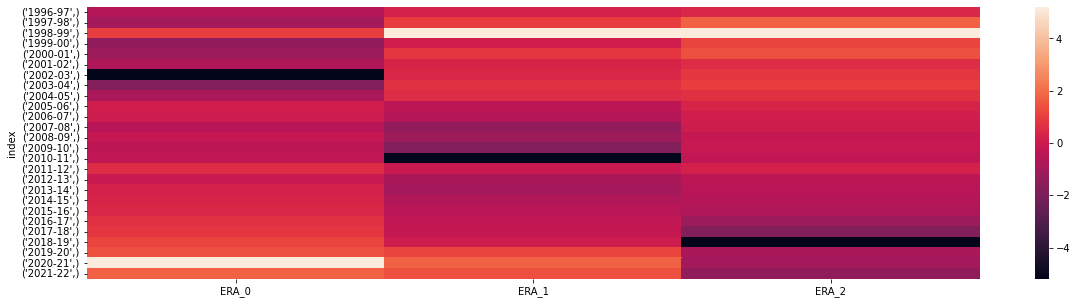

In [405]:
sns.heatmap(SeasonSimilarity(random_state=42).fit_transform(season).reset_index().groupby(["index"]).mean())

### Alternative: agglomerative clustering

In [406]:
# from sklearn.cluster import AgglomerativeClustering
# from scipy.cluster.hierarchy import dendrogram

# # create a custom transformer to cluster nba seasons into era
# class SeasonSimilarity2(BaseEstimator, TransformerMixin):
#   def __init__(self, n_clusters = 3, compute_distances = True):
#     self.n_clusters = n_clusters
#     self.compute_distances = compute_distances
  
#   def fit(self, X, y = None, sample_weight = None):
#     # group by season to get league average
#     X_season = X.groupby("SEASON").mean().sort_index()
#     self.feature_names_in_ = X.columns.values
#     self.index_names = X_season.sort_index().index.values
#     self.agg_cluster_ = AgglomerativeClustering(n_clusters=self.n_clusters, compute_distances=self.compute_distances)
#     self.agg_cluster_.fit(X_season)
#     return self
  
#   def transform(self, X):
#     X_season = X.groupby("SEASON").mean().sort_index()
#     X_cluster = pd.DataFrame(self.agg_cluster_.predict(X_season), index = X_season.index, columns=[f"ERA_{i}" for i in range(self.n_clusters)]).reset_index()
#     output = X[["SEASON"]].merge(X_cluster, how = "inner", on = "SEASON")
#     output.drop(columns = ["SEASON"], inplace = True)
#     output.index = X[["SEASON"]]
#     self.output_features = output.columns.values
#     return output
  
#   def get_feature_names_out(self, names = None):
#     return self.output_features

#   def plot_dendrogram(self, **kwargs):
#     model = self.agg_cluster_
#     def create_plot(model, **kwargs):
#       # Create linkage matrix and then plot the dendrogram

#       # create the counts of samples under each node
#       counts = np.zeros(model.children_.shape[0])
#       n_samples = len(model.labels_)
#       for i, merge in enumerate(model.children_):
#           current_count = 0
#           for child_idx in merge:
#               if child_idx < n_samples:
#                   current_count += 1  # leaf node
#               else:
#                   current_count += counts[child_idx - n_samples]
#           counts[i] = current_count

#       linkage_matrix = np.column_stack(
#           [model.children_, model.distances_, counts]
#       )

#       # Plot the corresponding dendrogram
#       dendrogram(linkage_matrix, **kwargs)

#     create_plot(model, truncate_mode="level", p=20)
#     plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#     locs, labels = plt.xticks() 
#     plt.xticks(locs, [season['SEASON'].unique().to_list()[int(x.get_text())] for x in labels])
#     plt.show()

In [407]:
# agg_cluster = SeasonSimilarity2(n_clusters = 3, compute_distances=True).fit(season)
# agg_cluster.plot_dendrogram()

## Combine transformers as a pipeline

In [408]:
data_preparation = make_pipeline(
    # create new columns for FG2A, FG2M, FG2_PCT, FG2_FG3
    NewColumn(),
    ColumnTransformer(
      [
      # fixing and scaling numeric columns
      ("num", num_pipeline, make_column_selector(dtype_include=np.number)),
      # KMeans clustering on SEASON to create columns representing different NBA eras
      ("era", SeasonSimilarity(random_state=42), make_column_selector(dtype_include=[np.number,"category"])),
      ], 
      # drop remaining identifier columns such as TEAM_ID
      remainder="drop",
      # drop column prefix
      verbose_feature_names_out = False, 
    )
)

season_prepared = pd.DataFrame(data_preparation.fit_transform(season),
                               columns = data_preparation.get_feature_names_out())
season_prepared

,W,L,W_PCT,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FG3M,OPP_FG3A,OPP_FG3_PCT,OPP_FTM,OPP_FTA,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PTS,FG2A,FG2M,FG2_PCT,FG2_FG3,ERA_0,ERA_1,ERA_2
0,2.943356,-2.721761,2.943356,2.721761,2.584916,1.296494,-0.057000,-0.229884,0.899274,-0.278219,-0.229884,-0.361759,2.336206,-0.103952,2.138607,2.584916,-0.425524,1.441829,-0.848600,-1.904707,-0.269769,0.346594,1.534121,5.199338,-0.573127,0.737137,-1.025357,-0.288809,-0.122381,-1.355292,-0.758667,-0.523467,-1.142499,1.802743,-2.202962,-0.634164,-1.011686,1.301224,0.276105,-1.904707,-0.848600,-1.127005,1.178402,2.031466,0.580336,0.383568,-0.582842,0.150969,0.467699
1,1.305983,-1.042720,1.207414,-0.561179,-0.355250,-0.407771,0.537519,0.556422,0.299432,0.624244,0.511835,0.190361,1.215892,-0.416631,0.750552,-1.053291,1.025357,1.603763,0.739810,-0.962021,-0.108044,0.800016,0.299432,1.268707,-0.626718,0.674490,-1.111778,-0.161432,-0.038667,-0.551678,-1.028805,-0.726500,-1.142499,1.626252,-1.459307,-0.059038,-0.310089,1.370745,0.276105,-0.962021,0.739810,-1.241867,-0.646652,-0.881131,-0.016278,-0.589994,-0.582842,0.150969,0.467699
2,-0.024418,0.227796,-0.136743,-0.392342,-1.001555,0.215285,-1.008297,-0.988206,-0.805633,1.093098,1.093098,-0.238249,0.394541,-1.547456,-1.004921,0.828358,0.750552,0.083516,2.251551,0.991526,0.791639,0.878136,-0.314361,-0.368283,-0.403353,-0.425524,-0.242437,-0.355250,-0.504890,0.418851,1.115560,1.082071,-0.122381,1.501923,-1.100524,0.213203,0.077392,1.085732,0.639147,0.991526,2.251551,0.028488,0.616844,0.851520,-0.118282,0.914623,-0.582842,0.150969,0.467699
3,2.100165,-1.904707,2.100165,1.345167,-1.957194,5.199338,-1.207414,-1.483329,0.755956,2.584916,2.159077,0.412197,-0.012208,-0.535170,-0.544585,2.943356,0.949173,1.845705,0.539871,-0.236156,1.753330,2.138607,1.534121,2.336206,-1.823803,-2.031466,-0.911536,-0.002035,0.052924,-0.240342,2.064598,2.015702,-0.374823,0.530480,-2.943356,-2.647169,-1.203207,1.633934,0.514156,-0.236156,0.539871,-0.602145,0.664308,2.584916,1.250714,1.365557,-0.582842,0.150969,0.467699
4,-0.646652,0.842782,-0.734470,-0.828358,0.114185,-1.008297,0.177945,0.167619,0.427753,-0.002035,0.368283,-1.215892,1.802743,-2.064598,-0.194507,-0.374823,1.633934,1.441829,1.734710,0.887147,1.074793,0.621773,-0.587574,-0.684742,-0.211122,-1.408136,0.718575,-0.204885,-0.108044,-0.488776,1.063980,1.447606,-1.943564,1.142499,-1.211642,-0.227796,1.582058,1.561073,1.035737,0.887147,1.734710,0.169683,-0.089642,-0.592417,-0.958794,-0.163494,-0.582842,0.150969,0.467699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.917719,-0.666847,0.816943,0.971762,0.819787,0.523467,1.834644,2.082053,-0.246630,-0.942808,-1.001555,0.495666,-1.255174,1.233116,0.016278,0.674490,-1.603763,-1.146415,-1.264171,-1.904707,-0.682173,-0.530480,1.589210,0.666847,0.682173,0.991526,0.225708,1.074793,1.397252,-1.011686,-1.211642,-1.277860,0.634164,-1.282477,1.514614,0.390146,0.661773,-1.150349,-1.018498,-1.904707,-1.264171,0.772303,-1.943564,-1.527554,1.868529,-2.031466,1.750686,1.405072,-1.750686
613,0.299432,-0.095772,0.171747,0.971762,0.065153,1.035737,1.330233,1.315590,0.048850,-0.766831,-0.755956,0.110090,-0.723853,1.082071,0.379192,1.340155,-0.357418,-0.802821,-0.975030,-0.518806,-2.138607,-0.671938,1.228776,0.377006,0.682173,1.424780,-0.124431,1.430417,1.527554,-0.165556,-1.725621,-1.792506,1.096804,-0.644146,0.305822,-0.416631,0.839883,-1.021921,0.761383,-0.518806,-0.975030,0.687317,-1.408136,-1.093098,1.641714,-1.375969,1.750686,1.405072,-1.750686
614,0.441169,-0.231974,0.325068,1.782453,0.318639,1.699178,0.978308,0.908458,0.726500,-0.570731,-1.166267,2.000424,-1.880317,0.554049,-1.146415,0.504890,-1.603763,-0.911536,-1.264171,-0.236156,-1.441829,-1.985599,

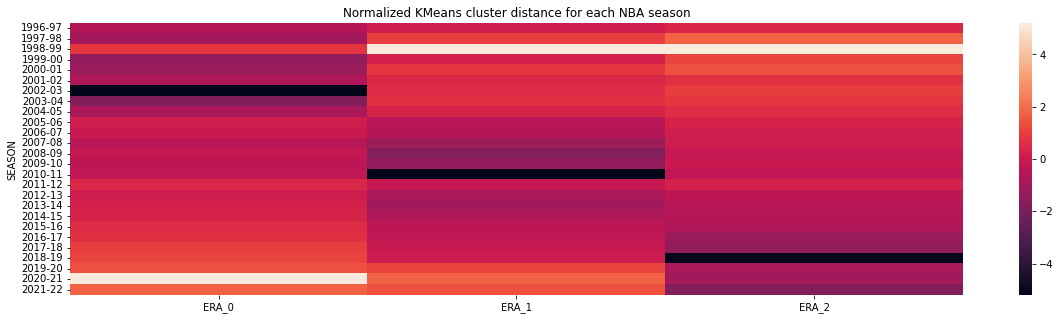

In [409]:
sns.heatmap(pd.concat([season[['SEASON']], season_prepared[['ERA_0', 'ERA_1', 'ERA_2']]], axis=1).groupby('SEASON').mean())
plt.title("Normalized KMeans cluster distance for each NBA season")
plt.show()

## Dimensionality reduction
- advantage
  - PCA can solve the axis orientation issue with decision tree
- disadvantage
  - information loss
  - harder to maintain pipeline as new data comes in
    - assume the current dataset is a random sampling of the underlying population, the PCA components should be stable
- considerations
  - let's not use PCA to allow interpretation of our feature
  - if we need to use decision tree, we can still use random forests or other ensemble methods on top of it
  - but random forest still assign high feature importance to highly correlated features (e.g. W_PCT, W, L)

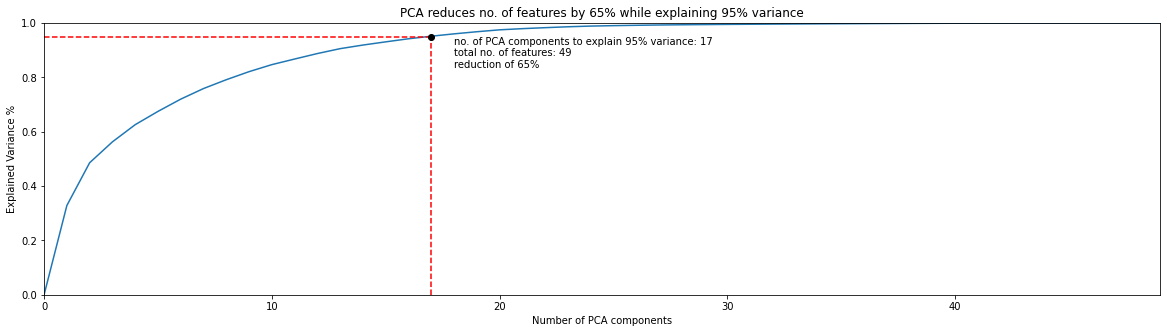

In [412]:
from sklearn.decomposition import PCA 
pca = PCA().fit(season_prepared)
pca_cumsum = np.cumsum(pca.explained_variance_ratio_)
# aim for 95% variance explained
target = np.argmax(pca_cumsum >= 0.95) + 1 # python starts counting at 0
plt.plot([*range(0,len(pca_cumsum)+1)], [0, *pca_cumsum])
plt.xlim(0,len(pca_cumsum))
plt.ylim(0,1)
plt.xlabel("Number of PCA components")
plt.ylabel("Explained Variance %")
plt.plot([target, target], [0, 0.95], 'r--')
plt.plot([0, target], [0.95, 0.95], 'r--')
plt.plot(target, 0.95, 'ko')
plt.annotate(f"no. of PCA components to explain 95% variance: {target}\n" + 
             f"total no. of features: {pca.n_features_in_}\n" + 
             f"reduction of {(pca.n_features_in_ - target) / pca.n_features_in_:0.0%}", 
             [target+1, 0.95],
             ha = 'left',
             va = 'top')
plt.title(f"PCA reduces no. of features by {(pca.n_features_in_ - target) / pca.n_features_in_:0.0%} while explaining 95% variance")
plt.show()

In [413]:
# add to data_preparation pipeline
data_preparation.steps.append(
    ("pca", PCA(n_components=0.95))
)

In [414]:
print(f"target no. of features to explain 95% variance = {data_preparation.fit_transform(season).shape[1]}")

target no. of features to explain 95% variance = 17


## Feature selection with Random Forest
- optional given we already reduce the number of features by a lot with PCA

In [415]:
selector = SelectFromModel(
    RandomForestClassifier(random_state=42),
    threshold=0 # set threshold to 0 to get all the features out
    ).fit(data_preparation.fit_transform(season), 
          season_label.reshape(-1,))

Text(0, 0.5, 'Feature importance')

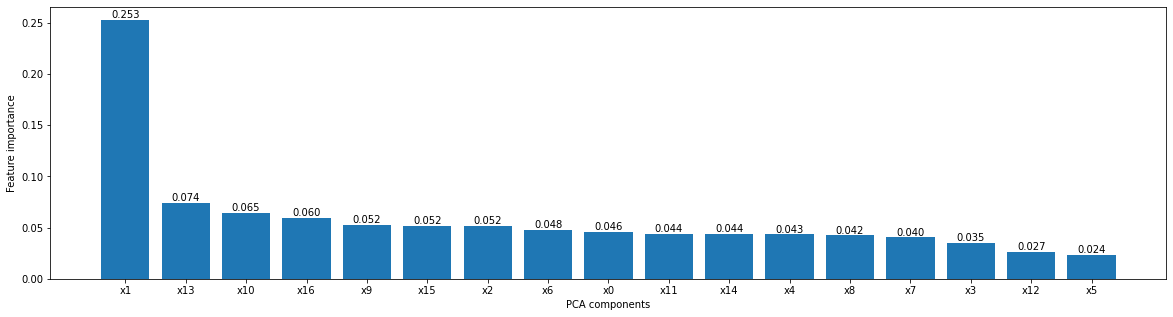

In [416]:
ranked_PCA_components = [*sorted(zip(selector.estimator_.feature_importances_, selector.get_feature_names_out()), reverse = True)]
fig, ax = plt.subplots(1,1)
ax.bar([x[1] for x in ranked_PCA_components], [x[0] for x in ranked_PCA_components])
for num in ranked_PCA_components:
    ax.annotate(f"{num[0]:0.3f}", (num[1], num[0]), ha = 'center', va = 'bottom')
plt.xlabel("PCA components")
plt.ylabel("Feature importance")

In [417]:
# let's keep every PCA component
# data_preparation.steps.append(
#     ("selector", SelectFromModel(
#     RandomForestClassifier(random_state=42),
#     threshold=0 # adjust this to reduce computing time
#     ))
# )

## Final pipeline = data_preparation



In [418]:
data_preparation

Pipeline(steps=[('newcolumn', NewColumn()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('fixpf',
                                                                   FixPF(col_drop='PFD',
                                                                         col_replace='OPP_PF')),
                                                                  ('dropcols',
                                                                   DropCols(cols_drop=['GP',
                                                                                       'MIN',
                                                                                       'OPP_PF',
                                                                                       'OPP_PFD'])),
                                                                  ('quantiletransformer',
                                             

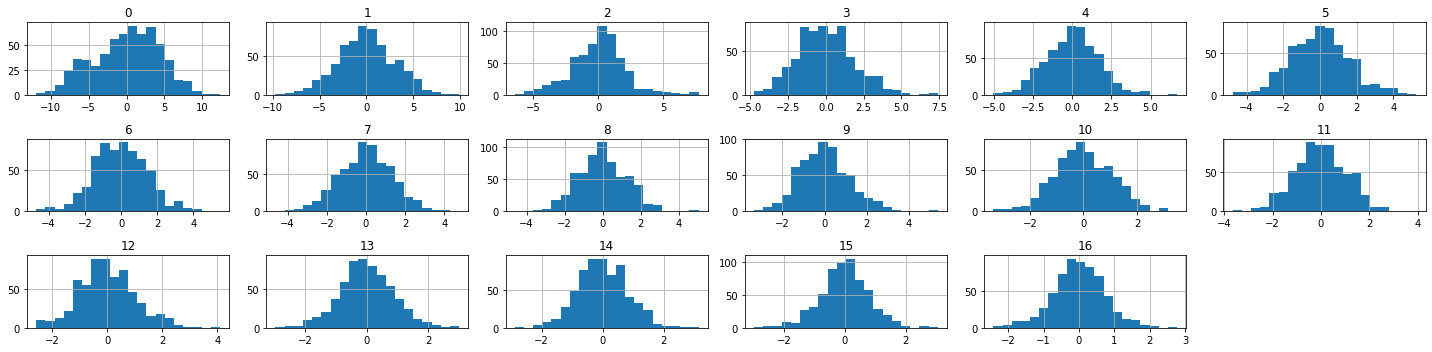

In [419]:
# plot distributions of each feature
fig, ax = plt.subplots(1,1)
plot_df = pd.DataFrame(data_preparation.fit_transform(season))
plot_df.hist(bins = 20, layout = (int(plot_df.shape[1] / 6) + 1, 6),
             ax = ax)
plt.title("Distribution of each feature after cleaning")
plt.tight_layout()

# 

# Ordinal logisitic regression 
- from mord import LogisticAT
- https://medium.datadriveninvestor.com/logistic-regression-simple-multinomial-and-ordinal-b2bc886bb974 